In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [272]:
!pip install tensorflow==1.15
!pip install keras==2.2.4 

In [4]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("../content/"))


['.config', 'gdrive', 'sample_data']


In [5]:
FAST_RUN = False
IMAGE_WIDTH=400
IMAGE_HEIGHT=400
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [6]:
filenames = os.listdir("../content/gdrive/My Drive/Last Dataset/train/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'safe':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories})

In [276]:
# from keras.models import Model
# from keras.applications.vgg16 import VGG16
# from keras.applications.resnet_v2 import ResNet152V2
# from keras.models import Model
# from keras.optimizers import SGD,RMSprop,Adam
# from keras.layers import Flatten,Dense,BatchNormalization,Dropout
# model = ResNet50(include_top=False, input_shape=(150,150,3))
# 	# mark loaded layers as not trainable

# for layer in model.layers:
#   	layer.trainable = False

# set_trainable = False
# for layer in model.layers:
#     if layer.name == 'block5_conv1':
#         set_trainable = True

# # for layer in model.layers:
# #   	layer.trainable = True
#   # add new classifier layers
# flat1 = Flatten()(model.layers[-1].output)
# class1 = Dense(1024, activation='relu')(flat1)
# class1 = BatchNormalization()(class1)
# class1 = Dropout(0.5)(class1)
# class1 = Dense(256, activation='softmax')(class1)
# output = Dense(2, activation='softmax')(class1)
#   # define new model
# model = Model(inputs=model.inputs, outputs=output)
#   # compile model
# opt = Adam(lr=0.0001)
# model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# model.summary()

In [277]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.optimizers import SGD,RMSprop,Adam
from keras.layers import Flatten,Dense,BatchNormalization,Dropout
model = VGG16(include_top=False, input_shape=(400,400,3))
	# mark loaded layers as not trainable
for layer in model.layers:
  	layer.trainable = True
  # add new classifier layers
flat1 = Flatten()(model.layers[-1].output)

class1 = Dense(1024, activation='relu')(flat1)
class1 = BatchNormalization()(class1)
class1 = Dropout(0.5)(class1)
class1 = Dense(256, activation='relu')(flat1)
class1 = BatchNormalization()(class1)
class1 = Dropout(0.2)(class1)
output = Dense(2, activation='softmax')(class1)
  # define new model
model = Model(inputs=model.inputs, outputs=output)
  # compile model
opt =Adam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 400, 400, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 400, 400, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 400, 400, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 200, 200, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 200, 200, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 200, 200, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 100, 100, 128)     0         
__________

In [10]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=2)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0000001)
callbacks = [ learning_rate_reduction]
df["category"] = df["category"].replace({0: 'unsafe', 1: 'safe'}) 
train_df = df

In [11]:
total_train = train_df.shape[0]
# total_validate = validate_df.shape[0]
batch_size=32

train_datagen = ImageDataGenerator(  rescale=1./255,
                                    horizontal_flip=True,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2

                                   )

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/gdrive/My Drive/Last Dataset/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)
filenames = os.listdir("../content/gdrive/My Drive/refined_dataset/val/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'safe':
        categories.append(1)
    else:
        categories.append(0)

dfv = pd.DataFrame({
    'filename': filenames,
    'category': categories})
dfv["category"] = dfv["category"].replace({0: 'unsafe', 1: 'safe'}) 
dfv.head()

Found 2463 validated image filenames belonging to 2 classes.


,filename,category
0,safe. (327).png,safe
1,safe. (313).png,safe
2,safe. (58).png,safe
3,unsafe. (94).png,unsafe
4,safe. (179).png,safe


In [12]:
validate_df = dfv
total_validate = dfv.shape[0]
validation_datagen = ImageDataGenerator(rescale=1./255,
                                         horizontal_flip=True,
                                       width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        zoom_range=0.2)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/gdrive/My Drive/Last Dataset/val", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)
filenames = os.listdir("../content/gdrive/My Drive/refined_dataset/test")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'safe':
        categories.append(1)
    else:
        categories.append(0)

dft = pd.DataFrame({
    'filename': filenames,
    'category': categories})
dft["category"] = dft["category"].replace({0: 'unsafe', 1: 'safe'}) 
dft.head()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 31 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 473 validated image filenames belonging to 2 classes.


,filename,category
0,safe. (11).png,safe
1,unsafe. (94).png,unsafe
2,safe. (171).png,safe
3,safe. (95).png,safe
4,unsafe. (52).png,unsafe


In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    validate_df, 
    "/content/gdrive/My Drive/Last Dataset/test", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)


Found 273 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 231 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [282]:
# from keras.models import load_model
# model = load_model('/content/gdrive/My Drive/Model Weights/resnet152_weights_tf.h5')

In [14]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/content/gdrive/My Drive/Last Dataset/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


In [284]:
# from keras.models import load_model
# model = load_model('/content/gdrive/My Drive/Last Dataset/115epochnewdataResnetv2152.h5')

In [15]:
from keras.callbacks import ModelCheckpoint
model_checkpoint_callback = ModelCheckpoint(
    filepath="/content/gdrive/My Drive/Last Dataset/check",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [286]:
# from keras.models import load_model
# model=load_model('/content/gdrive/My Drive/11-8Dataset/Resnet.h5')

In [ ]:
epochs=3 if FAST_RUN else 100
history = model.fit_generator(
    train_generator, 
    epochs=50,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks)


Epoch 1/50
76/76 [==============================] - 94s 1s/step - loss: 0.7213 - acc: 0.6653 - val_loss: 0.5572 - val_acc: 0.7357
Epoch 2/50
76/76 [==============================] - 83s 1s/step - loss: 0.6185 - acc: 0.7124 - val_loss: 0.5485 - val_acc: 0.7357
Epoch 3/50
76/76 [==============================] - 84s 1s/step - loss: 0.5733 - acc: 0.7417 - val_loss: 0.7844 - val_acc: 0.5877
Epoch 4/50
76/76 [==============================] - 81s 1s/step - loss: 0.5551 - acc: 0.7697 - val_loss: 0.6446 - val_acc: 0.7146

Epoch 00004: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
Epoch 5/50
76/76 [==============================] - 80s 1s/step - loss: 0.4997 - acc: 0.7939 - val_loss: 0.5110 - val_acc: 0.7992
Epoch 6/50
76/76 [==============================] - 82s 1s/step - loss: 0.4823 - acc: 0.8111 - val_loss: 0.4206 - val_acc: 0.8076
Epoch 7/50
76/76 [==============================] - 83s 1s/step - loss: 0.4857 - acc: 0.8096 - val_loss: 0.5820 - val_acc: 0.7357
Epoch 8/5

NameError: ignored

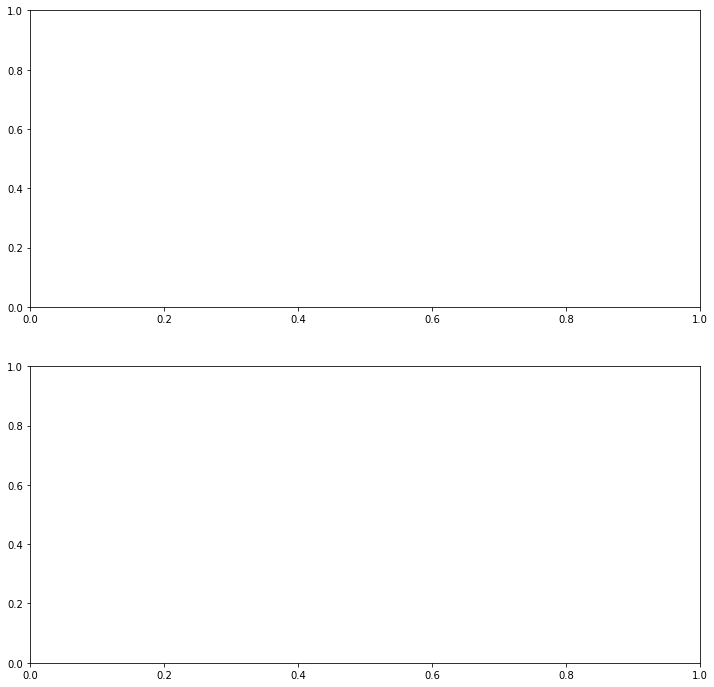

In [16]:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()


In [17]:
test_filenames = os.listdir("../content/gdrive/My Drive/Last Dataset/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

batch_size=64

test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../content/gdrive/My Drive/Last Dataset/test", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 273 validated image filenames.


Instructions for updating:
Please use Model.predict, which supports generators.
[[9.99991179e-01 8.86275484e-06]
 [1.56449596e-03 9.98435438e-01]
 [9.98942792e-01 1.05718779e-03]
 [9.99979973e-01 2.00106624e-05]
 [9.99999881e-01 1.77012282e-07]
 [9.99950290e-01 4.97537148e-05]
 [9.98079777e-01 1.92020496e-03]
 [1.00000000e+00 1.18156223e-08]
 [9.99809206e-01 1.90800260e-04]
 [9.99951243e-01 4.87599464e-05]
 [9.99997377e-01 2.60360207e-06]
 [1.57312900e-02 9.84268665e-01]
 [9.82310236e-01 1.76897962e-02]
 [9.88337934e-01 1.16621032e-02]
 [5.96179217e-02 9.40382123e-01]
 [4.02912915e-01 5.97087085e-01]
 [9.98619914e-01 1.38002669e-03]
 [9.79071379e-01 2.09286511e-02]
 [9.99841571e-01 1.58461320e-04]
 [9.98197496e-01 1.80254353e-03]
 [3.63238901e-01 6.36761129e-01]
 [9.99376118e-01 6.23952772e-04]
 [9.99990463e-01 9.51398306e-06]
 [9.99751747e-01 2.48205935e-04]
 [3.23854270e-04 9.99676108e-01]
 [9.99590576e-01 4.09418164e-04]
 [9.99826849e-01 1.73148437e-04]
 [2.41240561e-01 7.58759499e-

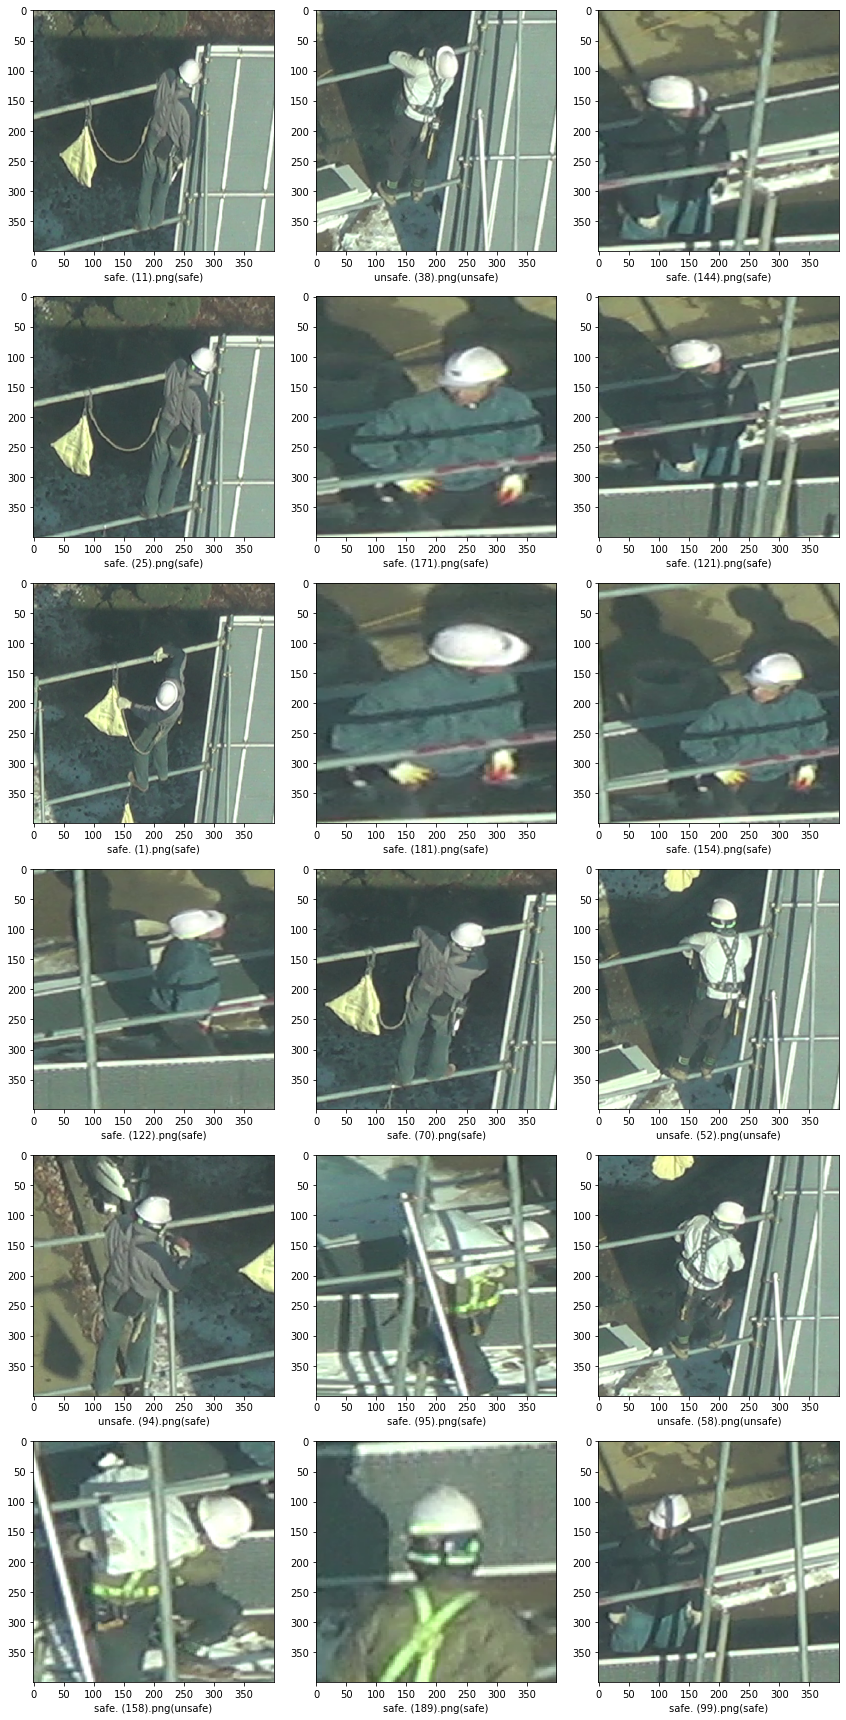

In [18]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
print(predict)
print(np.argmax(predict, axis=-1))
test_df['category'] = np.argmax(predict, axis=-1)
test_df["Pridect"] = np.argmax(predict, axis=-1)
test_df.to_csv(r'/content/gdrive/My Drive/Last Dataset/File Name.csv')
print(test_df['category'])
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 1:'safe', 0:'unsafe' })
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("../content/gdrive/My Drive/refined_dataset/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()


In [19]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['name'] = submission_df['filename'].str.split('.').str[1]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('/content/submission.csv', index=False)

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True)
# specify imagenet mean values for centering
datagen.mean = [123.68, 116.779, 103.939]
# prepare iterator

test_it = datagen.flow_from_directory('/content/gdrive/My Drive/TEst Lrp/Test/',
		class_mode='binary', batch_size=64, target_size=(400,400), classes=['Safe','Unsafe'])


In [ ]:
from keras.preprocessing.image import load_img,img_to_array
import os, cv2
f=[]
a=['/content/gdrive/My Drive/refined_dataset/Test with folder/safe/'+i for i in os.listdir('/content/gdrive/My Drive/refined_dataset/Test with folder/safe')]
for c,i in enumerate(a):

    showx=cv2.imread(i)
    x=img_to_array(showx)
    x=cv2.resize(x,(400,400))
    x=np.expand_dims(x,axis=0)
    p=model.predict(x,batch_size=None)
    print(p[0][0])
    if(p[0][0]>0.6):
     
     f.append(p[0][0])
print("orignal lenth:",len(a))
print("orignal lenth:",len(f))

In [ ]:
from keras.preprocessing.image import load_img,img_to_array
import os
f1=[]
a=['/content/gdrive/My Drive/refined_dataset/Test with folder/unsafe/'+i for i in os.listdir('/content/gdrive/My Drive/refined_dataset/Test with folder/unsafe')]
for i in a:

    x=cv2.imread(i)
    x=img_to_array(x)
    x=cv2.resize(x,(400,400))
    x=np.expand_dims(x,axis=0)
    p=model.predict(x,batch_size=None)
    print(p[0][0])
    if(p[0][0]<0.6):
     f1.append(i)
    #  print(i)
    #  print(model.predict(x,batch_size=None))
    
    
print("orignal lenth:",len(a))  
print("orignal lenth:",len(f1))  

In [ ]:
model.save('/content/gdrive/My Drive/refined_dataset/log/VGG16_Test7.h5')

In [3]:
from keras.models import load_model
 
# load model
model = load_model('/content/gdrive/My Drive/refined_dataset/log/VGG16_Test7.h5')